# Loop over MERGEDIR satellite datafiles, making images 



In [ ]:
# !pip install xarray matplotlib cartopy xemsf netCDF4 

In [57]:
def create_enhanced_ir_colormap():
    # Define coldest to warmest temperatures
    color_points = [
        (170, "#000000"),  # black (coldest cloud tops)
        (180, "#800080"),  # purple
        (190, "#ff0000"),  # red
        (200, "#ff8000"),  # orange
        (210, "#ffff00"),  # yellow
        (220, "#00ff00"),  # green
        (235, "#00ffff"),  # cyan
        (250, "#0000ff"),  # blue (end of enhancement)
        (270, "#a0a0a0"),  # mid gray
        (285, "#dcdcdc"),  # light gray
        #(300, "#ffffff"),  # white (warmest)
        (300, "#000000"),  # black surface

    ]

    # Extract and normalize
    temps, colors = zip(*color_points)
    min_temp, max_temp = temps[0], temps[-1]
    norm_temps = [(t - min_temp) / (max_temp - min_temp) for t in temps]

    norm_temps[0] = 0.0
    norm_temps[-1] = 1.0

    return mcolors.LinearSegmentedColormap.from_list(
        "enhanced_ir_smooth",
        list(zip(norm_temps, colors)),
        N=256
    )

    def save_colormap_to_cmap_file(cmap, filename="enhanced_ir.cmap", N=256):
    # Sample evenly from 0 to 1
    colors = cmap(np.linspace(0, 1, N))[:, :3]  # get RGB only
    with open(filename, "w") as f:
        for r, g, b in colors:
            f.write(f"{r:.6f} {g:.6f} {b:.6f}\n")
    print(f"Saved colormap to {filename}")

IndentationError: expected an indented block after function definition on line 33 (3634857131.py, line 35)

In [ ]:
# Setup
cmap = create_enhanced_ir_colormap()
vmin, vmax = 170, 300  # Consistent scaling
norm = mcolors.Normalize(vmin=170, vmax=300)

save_colormap_to_cmap_file(cmap, "enhanced_ir.cmap")

In [56]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pathlib import Path

# Optional: load topography for contours
from cartopy.io import shapereader
import numpy as np

# Set your data folder
data_folder = Path("/Users/bmapes/Box/Sky_Symphony_Box/ERNESTO12/MERGEDIR_BOXES/")  # change this
out_folder = data_folder / "plots"
out_folder.mkdir(exist_ok=True)

# Optional: topography for contours (using xarray example data)
# Skip this block if you don’t want contours
try:
    topo = xr.tutorial.open_dataset("rasm").isel(time=0)['Tair']  # placeholder
    use_topo = True
except Exception:
    use_topo = False


use_topo = False



# Loop through all .nc files
for nc_file in sorted(data_folder.glob("*.nc")):
    try:
        ds = xr.open_dataset(nc_file)
        Tb_all = ds['Tb']  # shape: (time, lat, lon) or similar
    except Exception as e:
        print(f"Failed to process {nc_file.name}: {e}")

    for i in range(Tb_all.sizes['time']):
        Tb = Tb_all.isel(time=i)  # extract one time slice
        time_str = str(Tb_all.time.values[i])  # format as needed
    
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

        #Tb.plot.imshow(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Tb'})
        #Tb.plot.imshow(ax=ax,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,cbar_kwargs={'label': 'Brightness Temperature [K]'})
        Tb.plot.imshow(ax=ax,transform=ccrs.PlateCarree(),cmap=cmap,norm=norm,cbar_kwargs={'label': 'Brightness Temperature [K]'})     
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
        ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.1)
    
        # Optional topo contours
        if use_topo:
            topo_contours = ax.contour(topo.lon, topo.lat, topo, 
                                       levels=np.arange(-40, 40, 5),
                                       colors='black', linewidths=0.5, alpha=0.3,
                                       transform=ccrs.PlateCarree())
            ax.clabel(topo_contours, fmt='%d', fontsize=6)
    
        ax.set_title(f"T_B from {nc_file.name} at {time_str}")
        plt.tight_layout()
    
        # Create unique filename with time index
        output_file = out_folder / f"{nc_file.stem}_t{i}.png"
        plt.savefig(output_file, dpi=150)
        plt.close()
        print(f"Saved: {output_file.name}")
    

Saved: time000_t0.png
Saved: time000_t1.png
Saved: time001_t0.png
Saved: time001_t1.png
Saved: time002_t0.png
Saved: time002_t1.png
Saved: time003_t0.png
Saved: time003_t1.png
Saved: time004_t0.png
Saved: time004_t1.png
Saved: time005_t0.png
Saved: time005_t1.png
Saved: time006_t0.png
Saved: time006_t1.png
Saved: time007_t0.png
Saved: time007_t1.png
Saved: time008_t0.png
Saved: time008_t1.png
Saved: time009_t0.png
Saved: time009_t1.png
Saved: time010_t0.png
Saved: time010_t1.png
Saved: time011_t0.png
Saved: time011_t1.png
Saved: time012_t0.png
Saved: time012_t1.png
Saved: time013_t0.png
Saved: time013_t1.png
Saved: time014_t0.png
Saved: time014_t1.png
Saved: time015_t0.png
Saved: time015_t1.png
Saved: time016_t0.png
Saved: time016_t1.png
Saved: time017_t0.png
Saved: time017_t1.png
Saved: time018_t0.png
Saved: time018_t1.png
Saved: time019_t0.png
Saved: time019_t1.png
Saved: time020_t0.png
Saved: time020_t1.png
Saved: time021_t0.png
Saved: time021_t1.png
Saved: time022_t0.png
Saved: tim

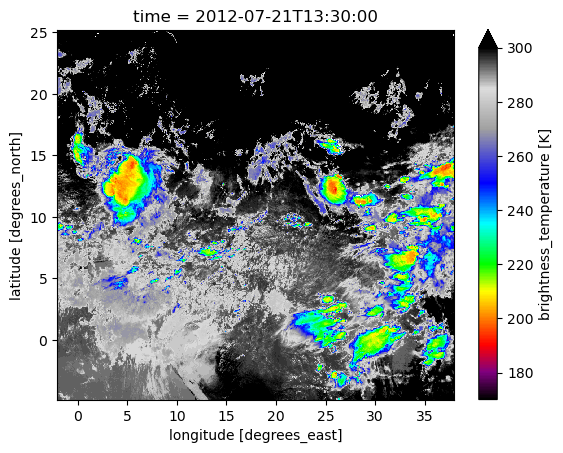

In [55]:
Tb.plot.imshow(cmap=cmap,norm=norm)

In [ ]:
def load_cmap_from_file(filename):
    rgb = np.loadtxt(filename)
    return mcolors.ListedColormap(rgb, name="enhanced_ir_from_file")

cmap = load_cmap_from_file("enhanced_ir.cmap")

In [ ]:
Tb.plot.imshow(cmap=cmap) #,norm=norm,cbar_kwargs={'label': 'Brightness Temperature [K]'}) 

In [64]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from pathlib import Path
import os
from subprocess import run

# ==== USER CONFIG ====
data_folder = Path("/Users/bmapes/Box/Sky_Symphony_Box/ERNESTO12/MERGEDIR_BOXES/")  # change this
frame_folder =Path("/Users/bmapes/Box/Sky_Symphony_Box/ERNESTO12/MERGEDIR_BOXES/frames")
frame_folder.mkdir(exist_ok=True)
video_filename = "/Users/bmapes/Box/Sky_Symphony_Box/ERNESTO12/MERGEDIR_BOXES/"+"enhanced_ir.mp4"

vmin, vmax = 170, 300
dpi = 150
# =====================

frame_folder.mkdir(exist_ok=True)

# 1. Create enhanced IR colormap (cold to warm)
def create_enhanced_ir_colormap():

    color_points = [
        (170, "#000000"),  # black (coldest cloud tops)
        (180, "#800080"),  # purple
        (190, "#ff0000"),  # red
        (200, "#ff8000"),  # orange
        (210, "#ffff00"),  # yellow
        (220, "#00ff00"),  # green
        (235, "#00ffff"),  # cyan
        (240, "#0000ff"),  # blue (end of enhancement)
        (250, "#ffffff"),  # white (warmest)
        (270, "#dcdcdc"),  # light gray
        (285, "#a0a0a0"),  # mid gray
        (300, "#000000"),  # black surface

    ]
    temps, colors = zip(*color_points)
    normed = [(t - min(temps)) / (max(temps) - min(temps)) for t in temps]
    normed[0], normed[-1] = 0.0, 1.0
    return mcolors.LinearSegmentedColormap.from_list("enhanced_ir", list(zip(normed, colors)), N=256)

cmap = create_enhanced_ir_colormap()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# 2. Preload lat/lon grids from all files
nc_files = sorted(data_folder.glob("*.nc"))
grid_info = []
for file in nc_files:
    with xr.open_dataset(file) as ds:
        grid_info.append({
            "file": file,
            "lat": ds['lat'].load(),
            "lon": ds['lon'].load()
        })

# 3. Generate plots with smoothed coastline movement
frame_count = 0

for i, grid in enumerate(grid_info):
    ds = xr.open_dataset(grid['file'])
    Tb_all = ds['Tb']
    lat_now = grid['lat']
    lon_now = grid['lon']

    if i < len(grid_info) - 1:
        lat_next = grid_info[i+1]['lat']
        lon_next = grid_info[i+1]['lon']
    else:
        lat_next = lat_now
        lon_next = lon_now

    for t in range(Tb_all.sizes['time']):
        Tb = Tb_all.isel(time=t)
        timestamp = str(Tb_all.time.values[t])[:16].replace(":", "").replace("T", "_")

        # Smooth coastlines for 2nd timestep
        if t == 0:
            coast_lat = lat_now
            coast_lon = lon_now
        else:
            coast_lat = 0.5 * (lat_now + lat_next)
            coast_lon = 0.5 * (lon_now + lon_next)

        # Define extent from coast grid
        extent = [
            float(coast_lon.min()), float(coast_lon.max()),
            float(coast_lat.min()), float(coast_lat.max())
        ]

        # Plot
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
        Tb.plot.imshow(
            ax=ax,
            transform=ccrs.PlateCarree(),
            cmap=cmap,
            norm=norm,
            add_colorbar=True,
            cbar_kwargs={'label': 'Brightness Temperature [K]'}
        )

        ax.set_extent(extent, crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)
        ax.set_title(f"Tb at {timestamp}", fontsize=12)
        plt.tight_layout()

        out_file = frame_folder / f"frame_{frame_count:04d}.png"
        plt.savefig(out_file, dpi=dpi)
        plt.close()
        print(f"Saved {out_file.name}")
        frame_count += 1

# 4. Create video using ffmpeg
ffmpeg_cmd = [
    "ffmpeg", "-y", "-framerate", "6",
    "-i", str(frame_folder / "frame_%04d.png"),
    "-c:v", "libx264", "-pix_fmt", "yuv420p",
    video_filename
]

print("Creating video...")
run(ffmpeg_cmd)
print(f"✅ Video saved as {video_filename}")


Saved frame_0000.png
Saved frame_0001.png
Saved frame_0002.png
Saved frame_0003.png
Saved frame_0004.png
Saved frame_0005.png
Saved frame_0006.png
Saved frame_0007.png
Saved frame_0008.png
Saved frame_0009.png
Saved frame_0010.png
Saved frame_0011.png
Saved frame_0012.png
Saved frame_0013.png
Saved frame_0014.png
Saved frame_0015.png
Saved frame_0016.png
Saved frame_0017.png
Saved frame_0018.png
Saved frame_0019.png
Saved frame_0020.png
Saved frame_0021.png
Saved frame_0022.png
Saved frame_0023.png
Saved frame_0024.png
Saved frame_0025.png
Saved frame_0026.png
Saved frame_0027.png
Saved frame_0028.png
Saved frame_0029.png
Saved frame_0030.png
Saved frame_0031.png
Saved frame_0032.png
Saved frame_0033.png
Saved frame_0034.png
Saved frame_0035.png
Saved frame_0036.png
Saved frame_0037.png
Saved frame_0038.png
Saved frame_0039.png
Saved frame_0040.png
Saved frame_0041.png
Saved frame_0042.png
Saved frame_0043.png
Saved frame_0044.png
Saved frame_0045.png
Saved frame_0046.png
Saved frame_0

ffmpeg version 7.1.1 Copyright (c) 2000-2025 the FFmpeg developers
  built with clang version 18.1.8
  configuration: --prefix=/Users/bmapes/.local/share/mamba/envs/hk25 --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --enable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1746479731466/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --disable-gnutls --enable-libvpx --enable-libass --enable-pthreads --enable-libopenvino --enable-gpl --enable-libx264 --enable-libx265 --enable-libmp3lame --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zli

✅ Video saved as /Users/bmapes/Box/Sky_Symphony_Box/ERNESTO12/MERGEDIR_BOXES/enhanced_ir.mp4


[out#0/mp4 @ 0x600003764000] video:255876KiB audio:0KiB subtitle:0KiB other streams:0KiB global headers:0KiB muxing overhead: 0.007027%
frame= 1380 fps= 39 q=-1.0 Lsize=  255894KiB time=00:03:49.66 bitrate=9127.5kbits/s speed=6.42x    
[libx264 @ 0x15c0057c0] frame I:12    Avg QP:18.77  size:271533
[libx264 @ 0x15c0057c0] frame P:455   Avg QP:24.29  size:196204
[libx264 @ 0x15c0057c0] frame B:913   Avg QP:25.65  size:185636
[libx264 @ 0x15c0057c0] consecutive B-frames: 11.5%  0.6%  0.7% 87.2%
[libx264 @ 0x15c0057c0] mb I  I16..4: 14.1% 33.5% 52.4%
[libx264 @ 0x15c0057c0] mb P  I16..4:  1.6% 19.4% 33.9%  P16..4:  4.3%  4.4%  3.2%  0.0%  0.0%    skip:33.2%
[libx264 @ 0x15c0057c0] mb B  I16..4:  0.7%  6.6% 26.1%  B16..8: 10.7% 11.3%  7.7%  direct: 4.5%  skip:32.3%  L0:32.6% L1:30.5% BI:36.8%
[libx264 @ 0x15c0057c0] 8x8 transform intra:27.0% inter:29.4%
[libx264 @ 0x15c0057c0] coded y,uvDC,uvAC intra: 94.8% 31.2% 30.1% inter: 35.2% 7.0% 6.9%
[libx264 @ 0x15c0057c0] i16 v,h,dc,p: 40% 20% 24